In [1]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 
import RIS_gravity_inversion.utils as utils

import numpy as np
import pandas as pd
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
# %load_ext snakeviz

'c:\\Users\\matthewt\\Documents\\Python_Scripts\\RIS_gravity_inversion'

# Functions

In [2]:
zoom = 0
n_shift = 0#150e3#600e3
w_shift = 0#-150e3#250e3
buffer = 300e3

# starting inversion region is 1,000km x 1,000km
e_inv = -580000+zoom+w_shift
w_inv = 420000-zoom+w_shift
n_inv = -1420000+zoom-n_shift
s_inv = -420000-zoom-n_shift

inv_reg = [e_inv, w_inv, n_inv, s_inv]
e_buff, w_buff, n_buff, s_buff = int(e_inv-buffer), int(w_inv+buffer), int(n_inv-buffer), int(s_inv+buffer)
buffer_reg = [e_buff, w_buff, n_buff, s_buff]
buffer_reg_str=f'{e_buff}/{w_buff}/{n_buff}/{s_buff}'
inv_reg_ll = "-180/180/-90/-71"

fig_height = 80
fig_width = fig_height*(w_inv-e_inv)/(s_inv-n_inv)

inv_ratio = (s_inv-n_inv)/(fig_height/1000)
buffer_ratio = (s_buff-n_buff)/(fig_height/1000)

inv_proj = f"x1:{inv_ratio}"
buffer_proj = f"x1:{buffer_ratio}"

inv_proj_ll = f"s0/-90/-71/1:{inv_ratio}"
buffer_proj_ll = f"s0/-90/-71/1:{buffer_ratio}"

layers_list = pd.Series([
             'ice',
             'water',
             'bathymetry',
             'basement',
            #  'moho'
])

spacing_list = pd.Series([
                100e3,
                100e3,
                100e3,
                100e3,
                # 20e3
])

rho_list = pd.Series([
            920, #890 to 917 from Muto et al. 2013
            1030, #from Muto et al. 2013
            2300,
            2670,
            # 3300
])

grav_spacing = 100e3

active_layer='bathymetry'

fname_list = pd.Series([
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc'
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc'
])

# forward_layers = {k:v for k,v in layers.items() if k not in ['ice']}

# inv_reg_ll = inv.GMT_reg_xy_to_ll(inv_reg)
# buffer_reg_ll = inv.GMT_reg_xy_to_ll(buffer_reg)

#  Import layers

filtering and resampling ice from 1000m to 100000m
filtering and resampling water from 1000m to 100000m
filtering and resampling bathymetry from 1000m to 100000m
filtering and resampling basement from 5000m to 100000m
ice: 256 points, elevations: 3260m to 0m
water: 256 points, elevations: 2231m to -1128m
bathymetry: 256 points, elevations: 2231m to -4178m
basement: 256 points, elevations: 2098m to -8282m
gravity: 19666 points
gravity avg. elevation: 1000
bathymetry control points:10475932


,x,y,Gobs,z
count,19666.000000,1.966600e+04,1.966600e+04,19666.0
mean,-93661.903793,-9.902100e+05,-3.699765e-16,1000.0
std,223211.973413,1.971037e+05,1.300581e+01,0.0
min,-562500.000000,-1.362500e+06,-8.287405e+01,1000.0
25%,-262500.000000,-1.147500e+06,-7.653712e+00,1000.0
50%,-92500.000000,-1.002500e+06,1.524566e-01,1000.0
75%,82500.000000,-8.475000e+05,7.794796e+00,1000.0
max,362500.000000,-4.675000e+05,7.537033e+01,1000.0


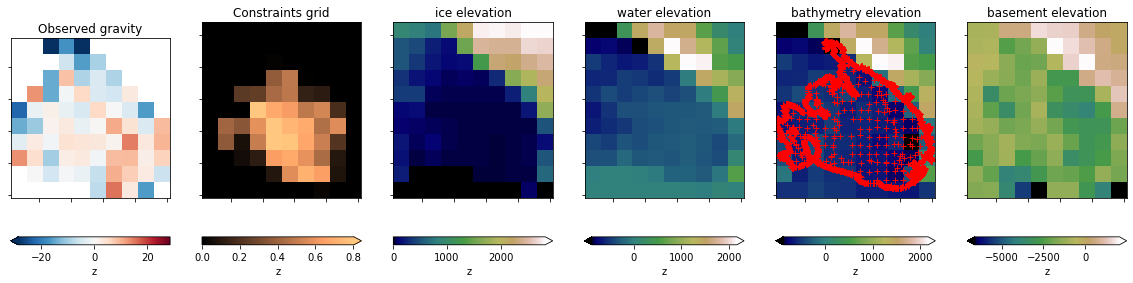

In [3]:
layers, df_grav, constraints_df, constraints_RIS_df = inv.import_layers(
    layers_list, 
    spacing_list, 
    rho_list, 
    fname_list,
    grav_spacing, 
    active_layer,
    buffer_reg,
    inv_reg,
    constraints=True,
    plot=True,
    plot_region=inv_reg
    )
df_grav.describe()

# Make prism layers

In [4]:
inv.grids_to_prism_layers(
    layers, 
    plot=False, 
    plot_type='3D', 
    plot_region=inv_reg,
    buffer_region = buffer_reg,
    inversion_region = inv_reg,
    ) 

basement top: -1510m and bottom: -8282m
bathymetry top: -377m and bottom: -1515m
water top: 29m and bottom: -382m
ice top: 1002m and bottom: 29m


# Forward gravity

finished ice layer
finished water layer
finished bathymetry layer
finished basement layer


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,basement_forward_grav,forward_total
count,19666.000000,1.966600e+04,1.966600e+04,19666.0,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04
mean,-93661.903793,-9.902100e+05,-3.699765e-16,1000.0,-1.849882e-15,3.699765e-16,7.399530e-16,5.179671e-15,7.492024e-15
std,223211.973413,1.971037e+05,1.300581e+01,0.0,6.352904e+00,7.337109e+00,6.945943e+01,8.219242e+01,1.572249e+01
min,-562500.000000,-1.362500e+06,-8.287405e+01,1000.0,-1.773747e+01,-1.098278e+01,-1.400861e+02,-2.002872e+02,-3.590897e+01
25%,-262500.000000,-1.147500e+06,-7.653712e+00,1000.0,-2.915600e+00,-6.783447e+00,-5.466502e+01,-7.403672e+01,-1.071680e+01
50%,-92500.000000,-1.002500e+06,1.524566e-01,1000.0,-1.128286e+00,-1.200195e-01,-1.244358e+01,1.519960e+01,3.864144e-01
75%,82500.000000,-8.475000e+05,7.794796e+00,1000.0,2.766675e+00,5.696250e+00,5.879285e+01,6.508210e+01,8.708397e+00
max,362500.000000,-4.675000e+05,7.537033e+01,1000.0,2.471532e+01,2.129393e+01,1.648279e+02,1.596943e+02,1.369869e+02


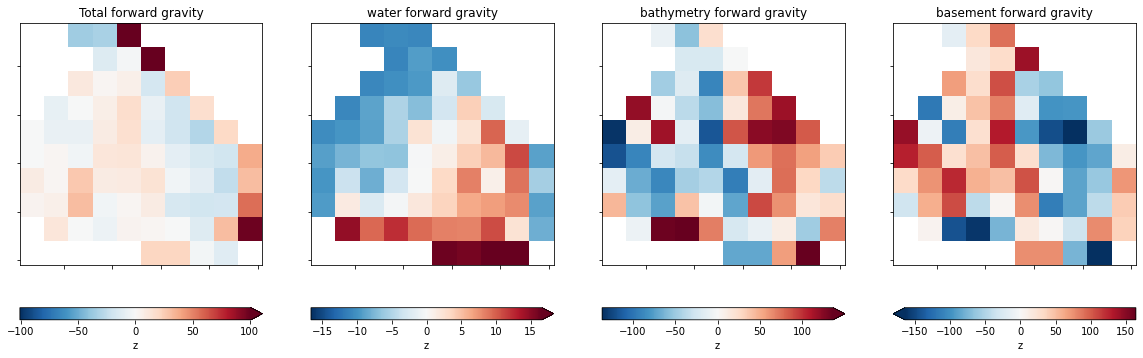

In [5]:
df_forward = inv.forward_grav_layers(layers, df_grav, ['ice'], inv_reg, grav_spacing, plot=True)
df_forward.describe()
# notify

# Anomalies

In [6]:
# regional_method='constraints'
# df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
#         corrections=['ice'], plot=True, plot_type='xarray', 
#         constraints_df=constraints_df, constraints_RIS_df=constraints_RIS_df)
# df_anomalies.describe()

,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,basement_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,19666.000000,1.966600e+04,1.966600e+04,19666.0,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,19666.000000,19666.000000
mean,-93661.903793,-9.902100e+05,-3.699765e-16,1000.0,-1.849882e-15,3.699765e-16,7.399530e-16,5.179671e-15,7.492024e-15,1.479906e-15,-5.919624e-15,-0.003526,0.003526
std,223211.973413,1.971037e+05,1.300581e+01,0.0,6.352904e+00,7.337109e+00,6.945943e+01,8.219242e+01,1.572249e+01,1.542684e+01,2.170613e+01,16.486313,12.579837
min,-562500.000000,-1.362500e+06,-8.287405e+01,1000.0,-1.773747e+01,-1.098278e+01,-1.400861e+02,-2.002872e+02,-3.590897e+01,-8.418463e+01,-1.766630e+02,-85.752127,-115.157157
25%,-262500.000000,-1.147500e+06,-7.653712e+00,1000.0,-2.915600e+00,-6.783447e+00,-5.466502e+01,-7.403672e+01,-1.071680e+01,-8.507146e+00,-1.317440e+01,-11.239567,-6.528650
50%,-92500.000000,-1.002500e+06,1.524566e-01,1000.0,-1.128286e+00,-1.200195e-01,-1.244358e+01,1.519960e+01,3.864144e-01,1.279945e+00,-6.890637e-02,-1.877327,-0.050601
75%,82500.000000,-8.475000e+05,7.794796e+00,1000.0,2.766675e+00,5.696250e+00,5.879285e+01,6.508210e+01,8.708397e+00,9.634464e+00,1.549968e+01,12.551021,6.549214
max,362500.000000,-4.675000e+05,7.537033e+01,1000.0,2.471532e+01,2.129393e+01,1.648279e+02,1.596943e+02,1.369869e+02,7.673755e+01,5.726291e+01,32.158851,78.468421


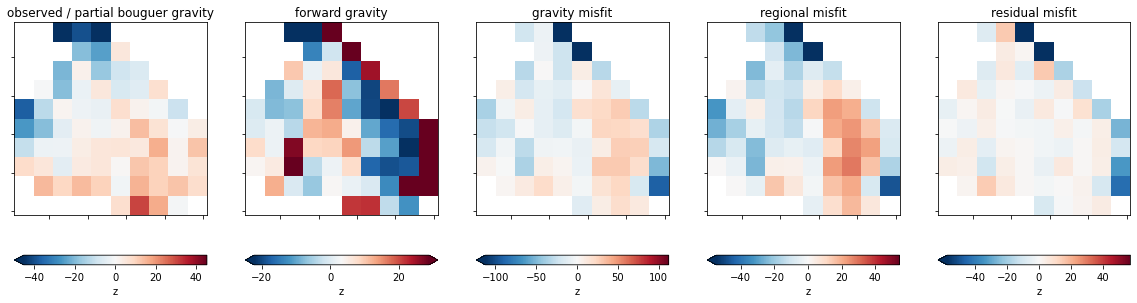

In [7]:
regional_method='filter'
filter='g200e3'
df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
        corrections=['ice'], filter=filter, plot=True, plot_type='xarray')
df_anomalies.describe()

In [8]:
# regional_method='trend'
# trend_order=8
# df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
#         corrections=['ice'], trend_order=trend_order, plot=True, plot_type='xarray')
# df_anomalies.describe()

# Geo inversion

In [9]:
# %%snakeviz -t
regional_method='filter'
filter='g200e3'
trend_order=8
iter_corrections, df_inversion = inv.geo_inversion(
    active_layer='bathymetry',
    exclude_layers=['ice'],
    layers=layers, 
    input_grav=df_anomalies, 
    input_grav_column='Gobs',
    regional_method=regional_method, 
    grav_spacing = grav_spacing,
    inversion_region=inv_reg,
    buffer_region=buffer_reg,
    filter=filter, 
    trend_order=trend_order,
    deriv_type='annulus',
    # reset=True,
    constraints=False,
    Max_Iterations=3,
    max_layer_change_per_iter=100,
    misfit_sq_tolerance=0.00001,
    delta_misfit_squared_tolerance=0.002,
    ) 
# 15 mins 200km zoom/5k, 7mins 400kmzoom/5k (113x113 prisms, 33x33 grav) 
# 1:54s for annulus
# 1:46s for prisms
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 5th trend,: 18m 3s
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 400km filter,: 19m 35s
notify

##################################
iteration 1
initial RMS residual = 12.58mGal
finished jacobian
finished least squares
average layers correction 94.85m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 11.81mGal
##################################
iteration 2
initial RMS residual = 11.81mGal
finished jacobian
finished least squares
average layers correction 93.47m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 11.46mGal
##################################
iteration 3
initial RMS residual = 11.46mGal
finished jacobian
finished least squares
average layers correction 92.07m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 11.08mGal
Inversion terminated after 3 iterations with least-squares norm=122 because maximum number of iterations (3) reached


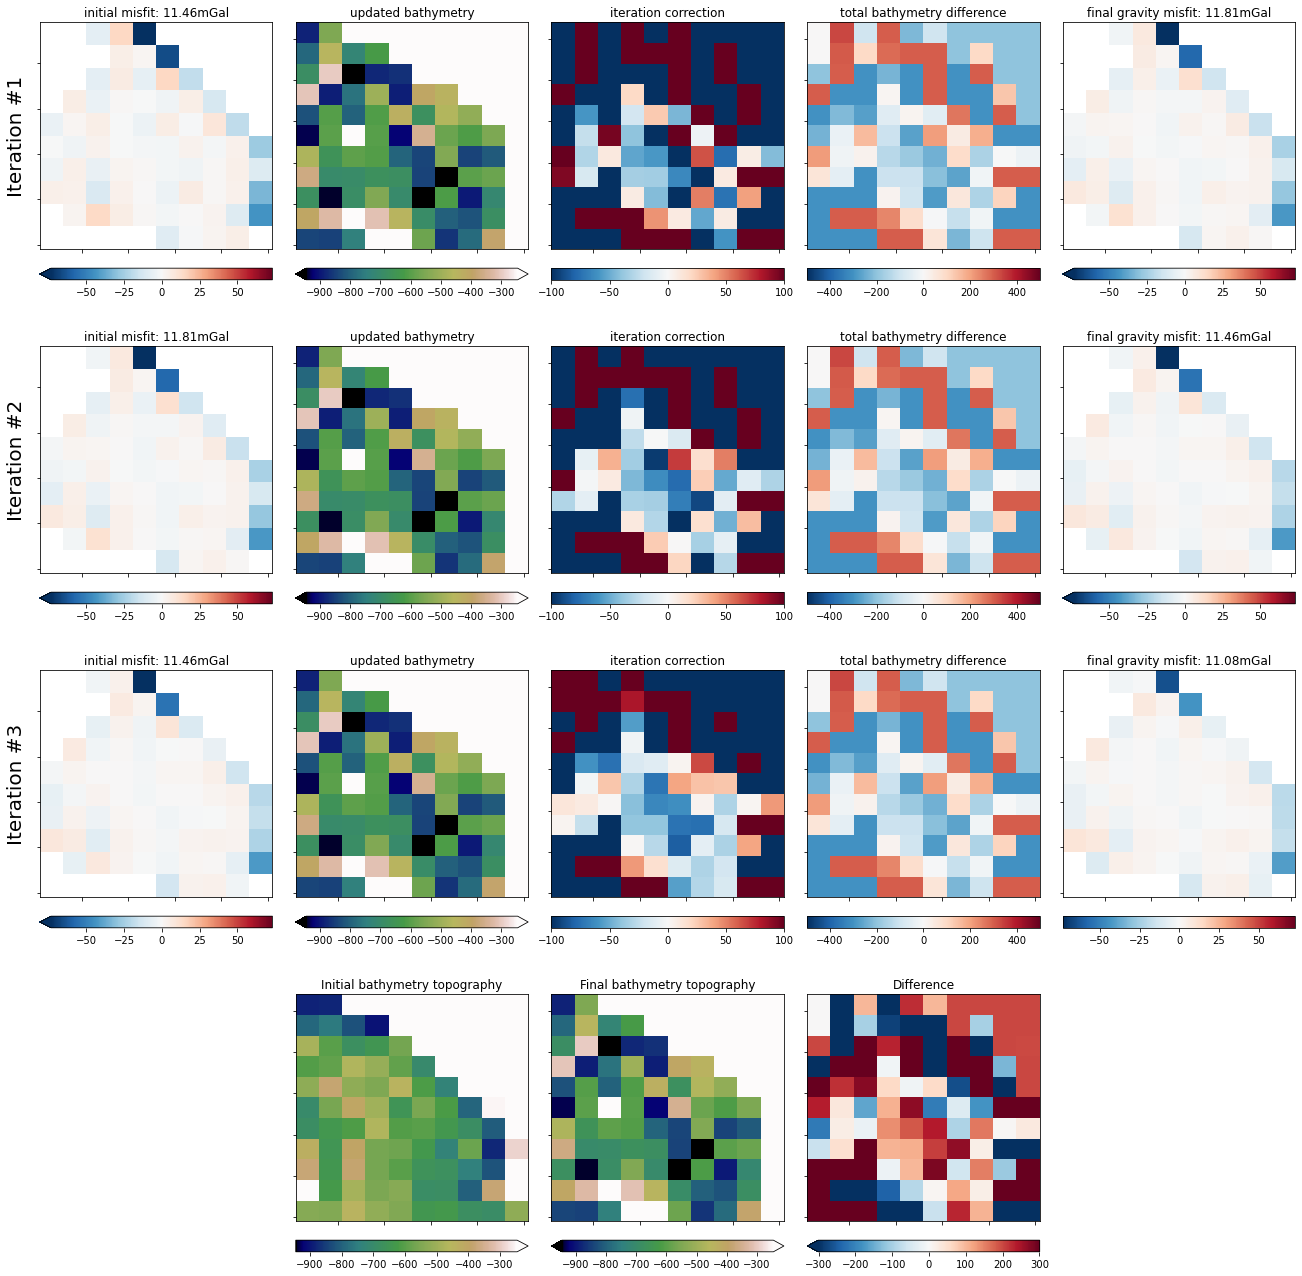

In [10]:
inv.plot_inversion_results(
    input_grav = df_anomalies,
    inversion_region = inv_reg,
    active_layer = 'bathymetry',
    grav_spacing = grav_spacing,
    epsg = 'epsg:3031',
    max_layer_change_per_iter = 100,
    constraints_RIS_df = constraints_RIS_df,
    constraints = False,
    layers = layers,
    iter_corrections = iter_corrections,
)

# Density inversion

In [11]:
# density_inversion(density_layer='bathymetry', plot=True) #10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify